In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("../../../test_data/system_tests/proteoforms/mouse_tissues")

In [3]:
RESULTS_DIR = "results_200ng"
EXAMPLE_CONDPAIR = ('brain', 'testis')
INPUT_FILE = "20231004_160735_20230926_Report.tsv.spectronaut_fragion_isotopes.aq_reformat.tsv"
SAMPLEMAP = "samplemap_200.tsv"


In [4]:
import alphaquant.cluster.outlier_scoring as aqoutlier
import alphaquant.utils.utils as aqutils

condpair_tree = aqutils.read_condpair_tree(cond1=EXAMPLE_CONDPAIR[0], cond2=EXAMPLE_CONDPAIR[1], results_folder=RESULTS_DIR)

outlier_handler = aqoutlier.OutlierHandler(condpair_tree)
clusterdiff_list = outlier_handler.get_diffclust_overview_list()

/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_46638/2196919489.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,clusterdiff,id,protein,quality_score,quality_score_bin
1299,7.489485,P05214_0_1,P05214,2.000000,2
1535,6.428170,Q8VCA8_0_1,Q8VCA8,1.200000,1
1430,5.602824,A0A140LJ04;E9Q5W5;Q5SSH7_0_1,A0A140LJ04;E9Q5W5;Q5SSH7,1.538462,2
1202,5.457680,P54869_0_1,P54869,2.500000,2
29,5.302006,E9Q456_0_1,E9Q456,2.666667,3
381,5.172362,Q61036_0_4,Q61036,3.000000,3
1043,5.128210,B2RQC6;E9QAI5_0_1,B2RQC6;E9QAI5,4.000000,4
1595,5.118465,Q8K0V4_0_1,Q8K0V4,3.000000,3
1006,5.087570,P63024_0_1,P63024,1.111111,1
935,5.068246,Q9CRB6_0_1,Q9CRB6,4.000000,4


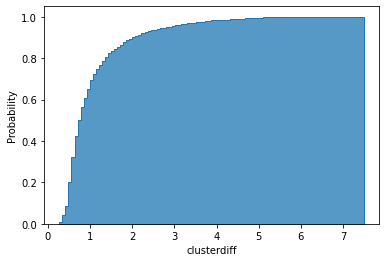

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

def generate_clusterdiff_dataframe(clusterdiff_list):
    info_dict = {}
    info_dict['clusterdiff'] = [x.fcdiff for x in clusterdiff_list]
    info_dict['id'] = [x.name for x in clusterdiff_list]
    info_dict['protein'] = [x.protein_name for x in clusterdiff_list]
    info_dict['quality_score'] = [x.quality_score for x in clusterdiff_list]
    info_dict['quality_score_bin'] = [round(x) for x in  info_dict['quality_score']]

    return pd.DataFrame(info_dict)


def plot_clusterdiff_overview(clusterdiff_list):
    fig, ax = plt.subplots()
    df_clusterdiff = generate_clusterdiff_dataframe(clusterdiff_list)
    sns.histplot(data=df_clusterdiff, x="clusterdiff", ax=ax, cumulative=True, stat="probability", bins=100, common_norm=False, element="step")
    fig.show()


plot_clusterdiff_overview(clusterdiff_list)


df_clusterdiff = generate_clusterdiff_dataframe(clusterdiff_list)
df_clusterdiff = df_clusterdiff.sort_values(by=['clusterdiff'], ascending=False)
df_clusterdiff_top = df_clusterdiff.head(50)
df_clusterdiff_bottom = df_clusterdiff.tail(50)
display(df_clusterdiff_top)

top_proteins = df_clusterdiff_top['protein'].tolist()
bottom_proteins = df_clusterdiff_bottom['protein'].tolist()


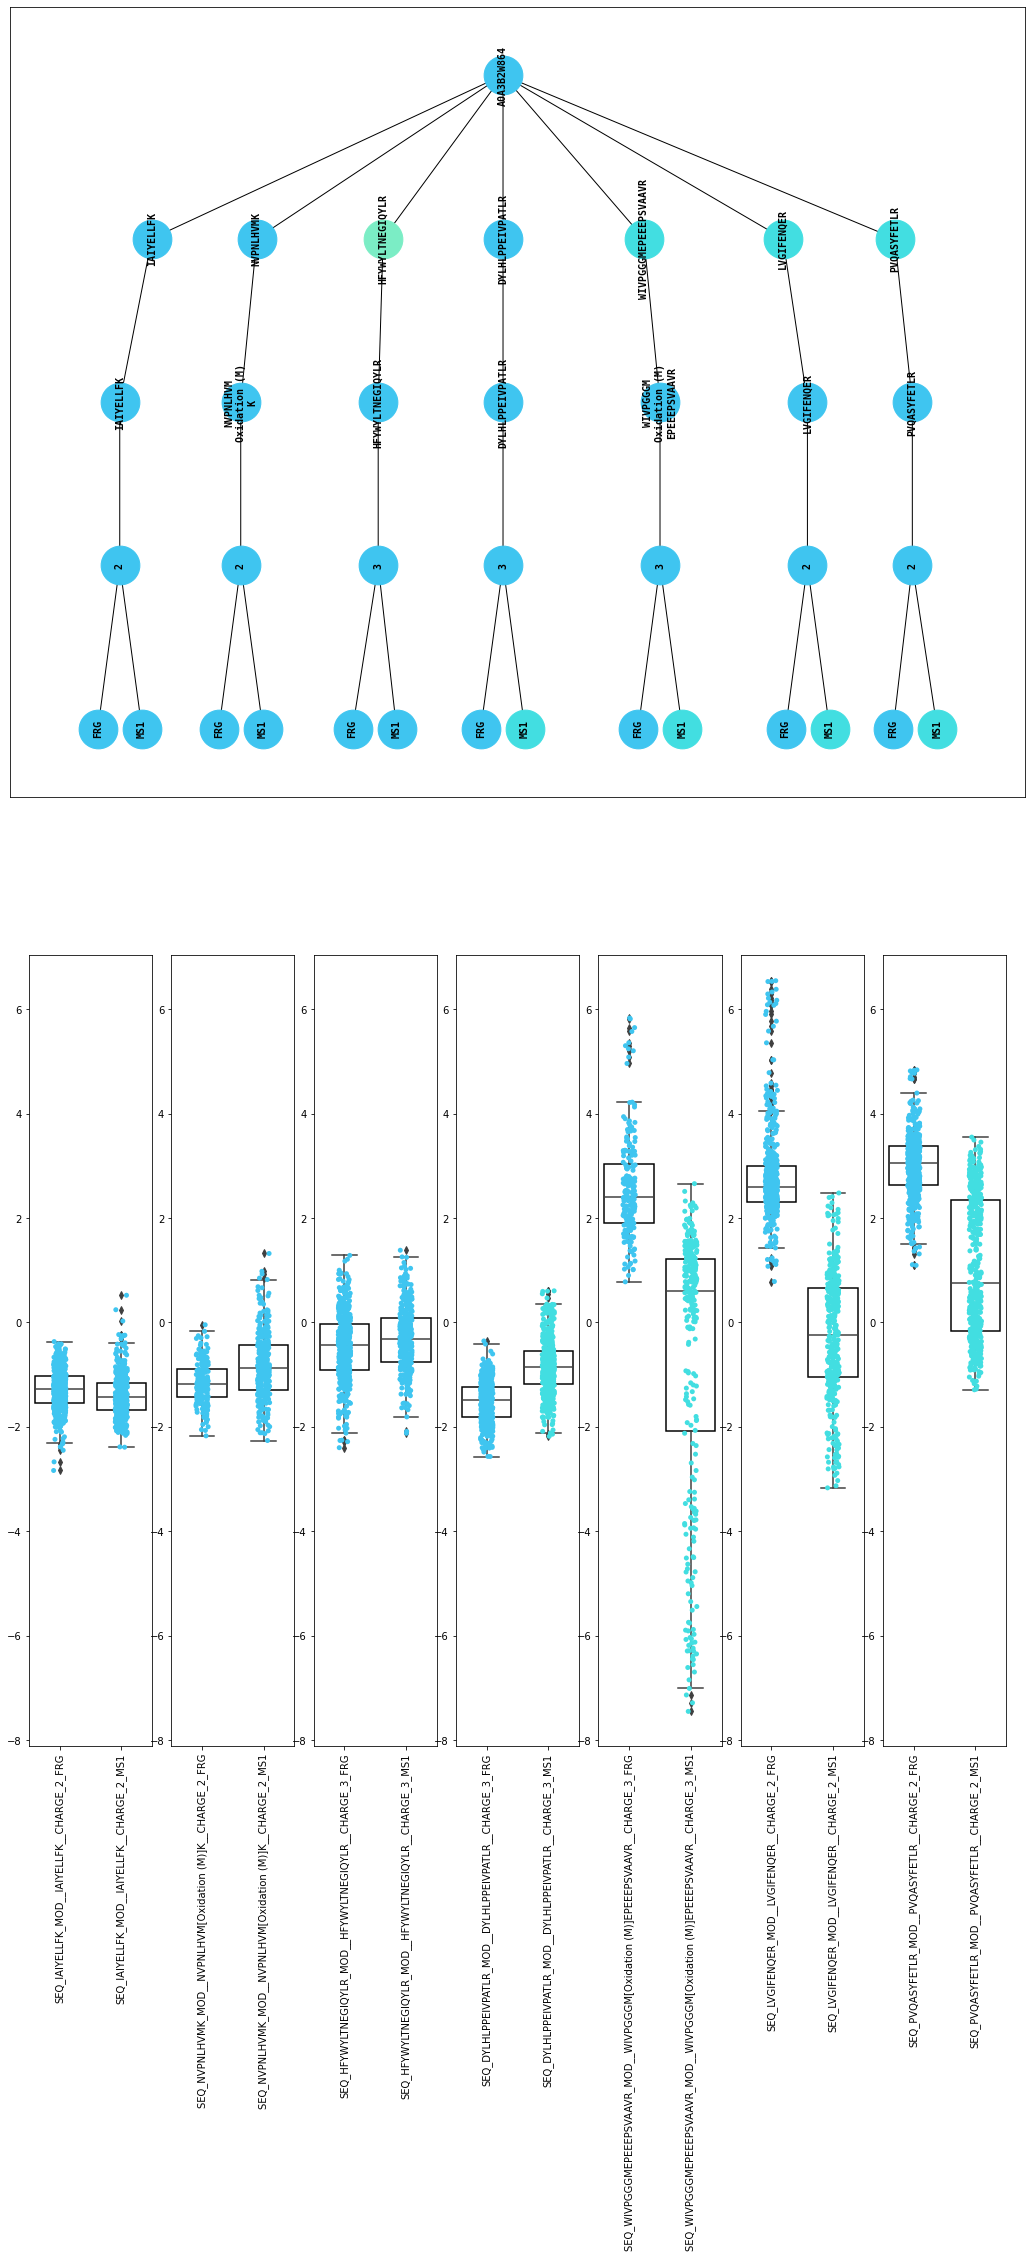

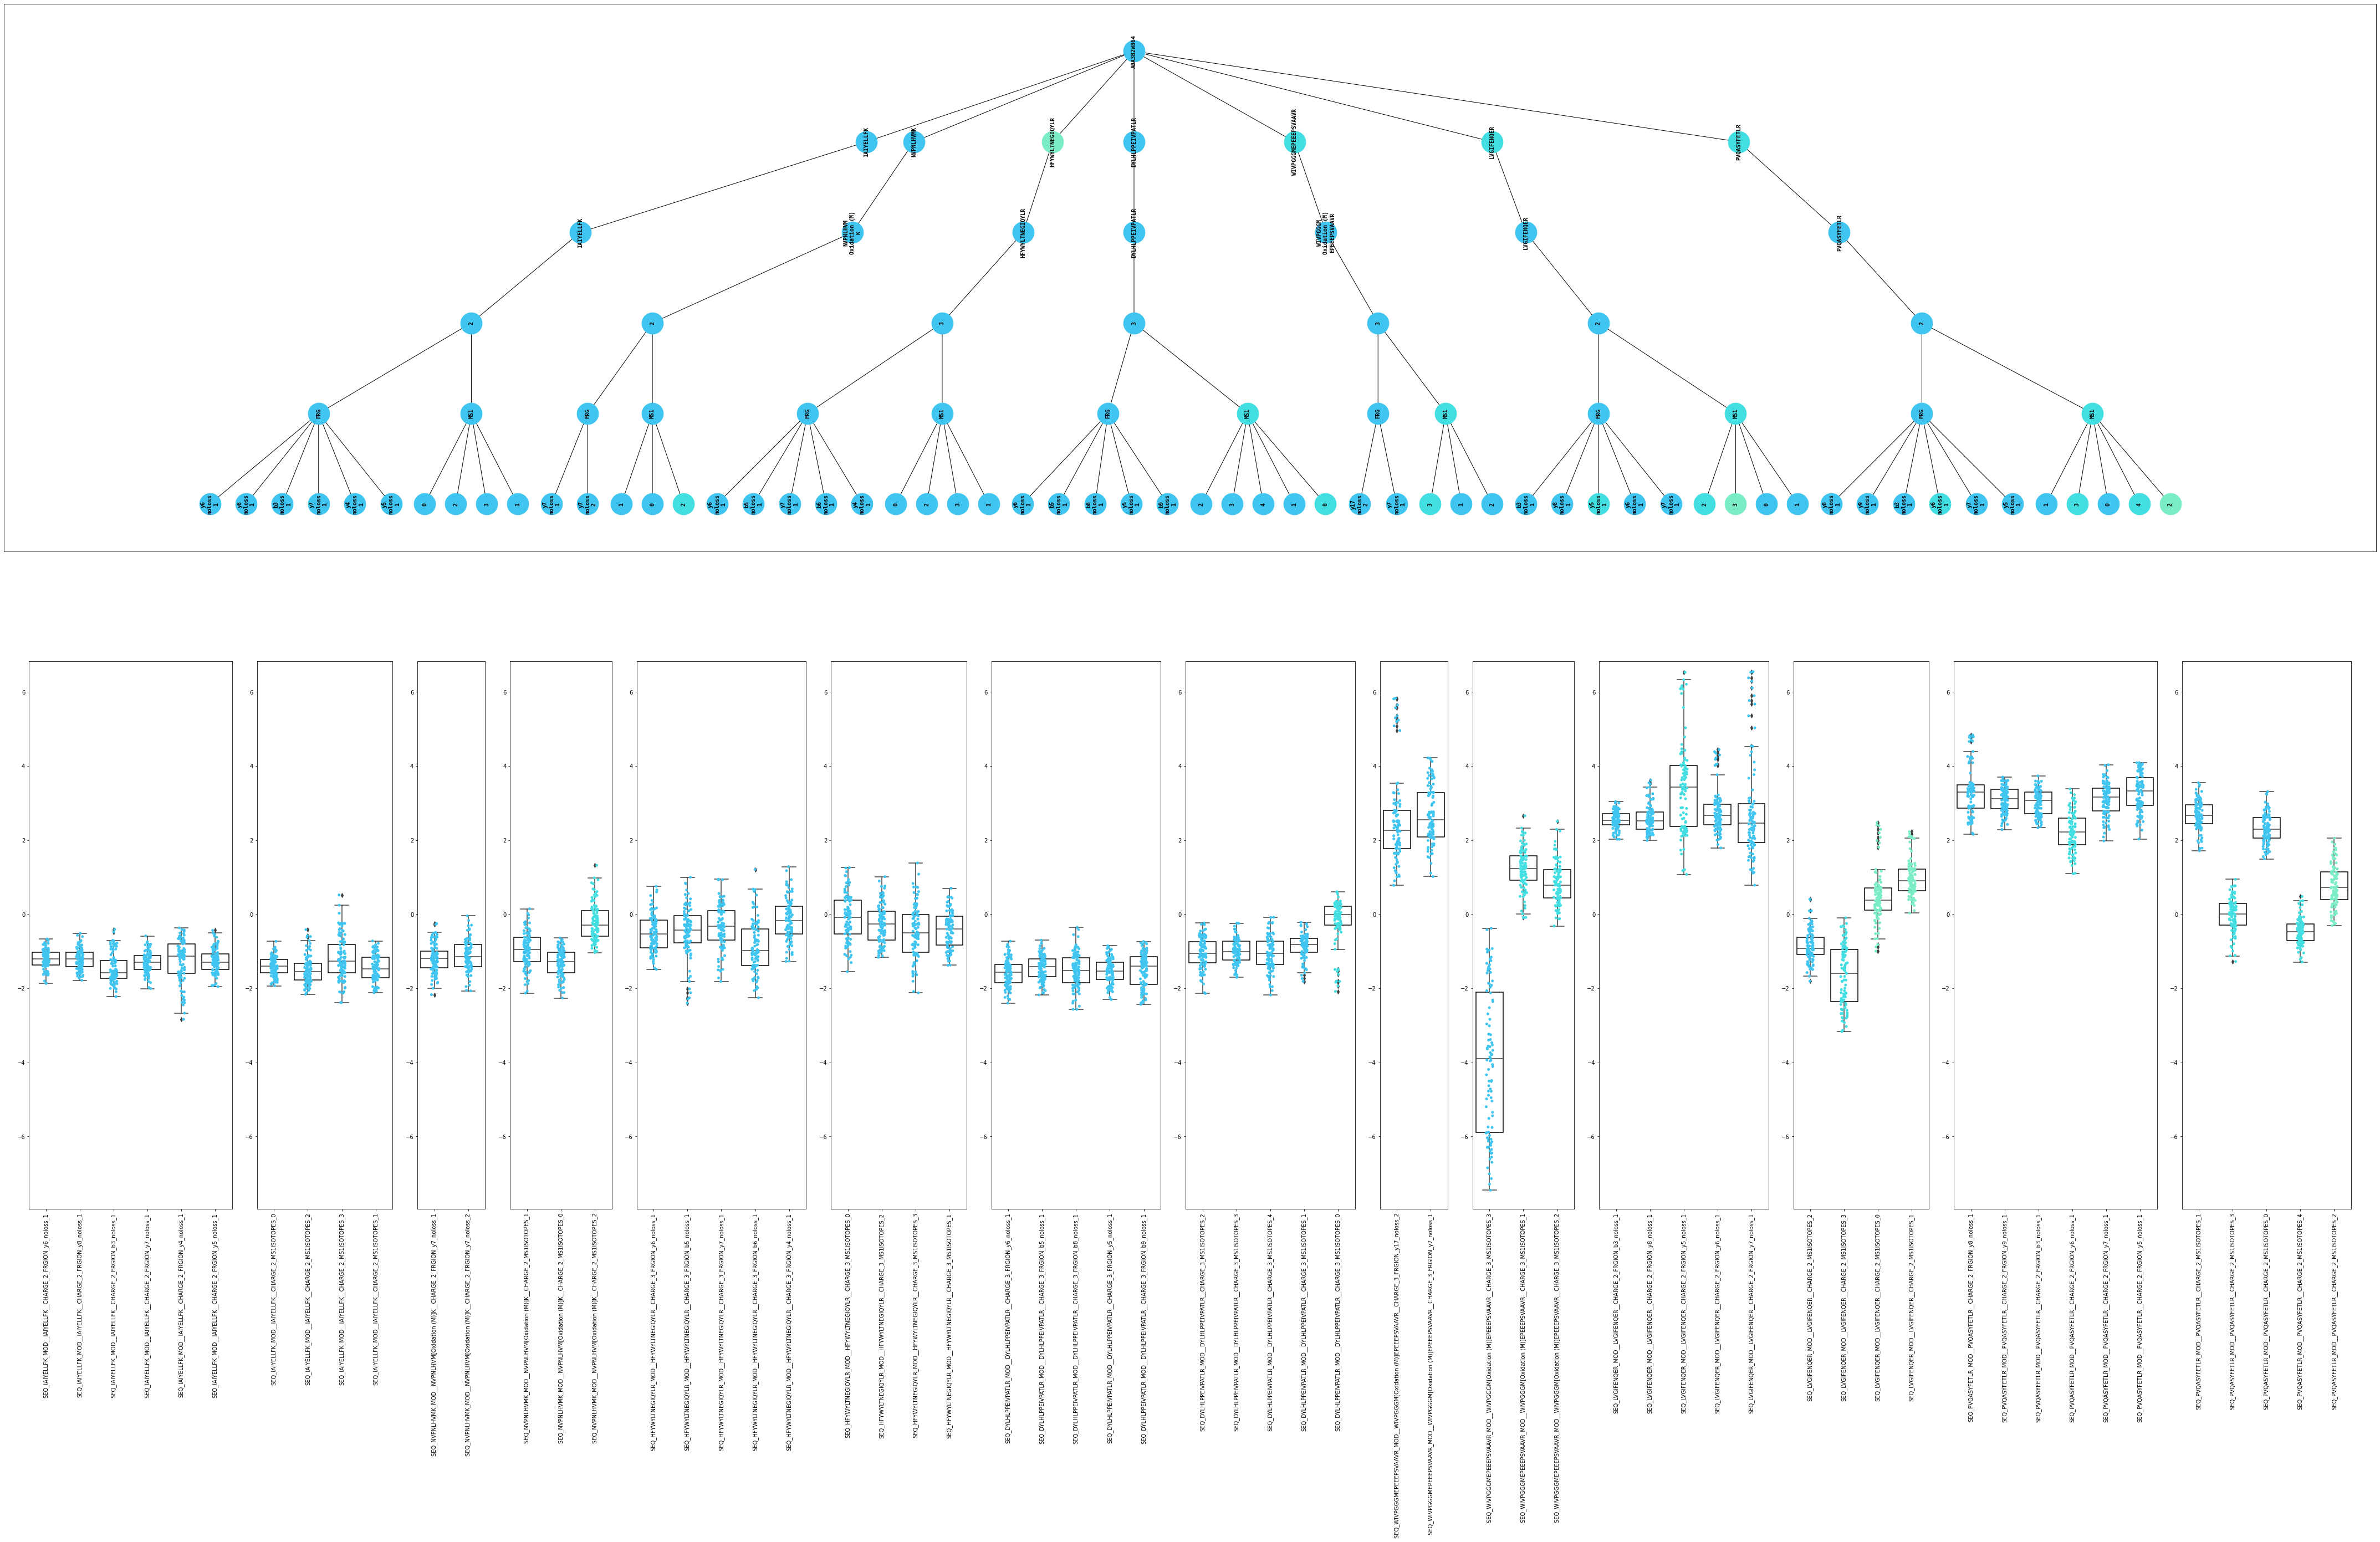

In [13]:
import alphaquant.viz.fcviz as aqfcviz
import alphaquant.viz.tree_and_fc_viz as aqcomboviz
import alphaquant.viz.visualizations as aqviz
import copy

plotconfig = aqfcviz.PlotConfig()
plotconfig.add_stripplot = True
plotconfig.narrowing_factor_for_fcplot = 0
plotconfig.rescale_factor_y = 2
plotconfig.label_rotation = 90
plotconfig.set_config_to_order_along_protein_sequence(organism="Mouse")
plotconfig.colorlist = aqviz.AlphaPeptColorMap().colorlist

plotconfig.parent_level = "mod_seq_charge"

plotconfig2 = copy.deepcopy(plotconfig)

plotconfig2.parent_level = "ion_type"

quantification_info = aqfcviz.CondpairQuantificationInfo(EXAMPLE_CONDPAIR, RESULTS_DIR, SAMPLEMAP)



for type_node in condpair_tree.children:
    if type_node.name in top_proteins:
        if not "A0A3B2" in type_node.name:
            continue
        
        combined_plotter = aqcomboviz.CombinedTreeAndFCPlotter(type_node, quantification_info, plotconfig)
        
        combined_plotter = aqcomboviz.CombinedTreeAndFCPlotter(type_node, quantification_info, plotconfig2)
        #pcplotter.plot_all_child_elements()
        #plt.show()
        #combined_plotter.fig.savefig(f"{symbol}_fcplot.pdf", dpi=300)
    
    